In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Overview: In this Notebook we will clean and examining some techniques to transform and preprocess our datasets.
## moreover, I will create two Preprocessed dataframes, one for each type of model. 

In [3]:
data= pd.read_csv("C:/Users/Fawzi/Desktop/bank/bank-full.csv", delimiter=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dropping rows where duration is null

In [5]:
(data['duration']==0).value_counts()

False    45208
True         3
Name: duration, dtype: int64

In [6]:
data=data[data['duration']>0]

In [7]:
(data['duration']==0).value_counts()

False    45208
Name: duration, dtype: int64

In [8]:
(data['pdays']==-1).value_counts()
# we have 36954 customers have been contacted for the first time

True     36951
False     8257
Name: pdays, dtype: int64

In [9]:
data = data.replace('unknown', np.nan)

In [10]:
data.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13019
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36956
y                0
dtype: int64

In [11]:
data['poutcome'].unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

In [12]:
data_cl=data.dropna(axis=0)

In [13]:
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   object
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   object
 7   loan       7842 non-null   object
 8   contact    7842 non-null   object
 9   day        7842 non-null   int64 
 10  month      7842 non-null   object
 11  duration   7842 non-null   int64 
 12  campaign   7842 non-null   int64 
 13  pdays      7842 non-null   int64 
 14  previous   7842 non-null   int64 
 15  poutcome   7842 non-null   object
 16  y          7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [14]:
print(584/(584+4095))
914/(914+499)

0.12481299422953622


0.6468506723283793

#### we left of by 7840 observations from 45210 

## Dropping the "poutcome" and then drop the missing values

In [15]:
data_cl1=data.drop(data[['poutcome']],axis=1)
data_cl1=data_cl1.dropna(axis=0)
data_cl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30905 entries, 12657 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        30905 non-null  int64 
 1   job        30905 non-null  object
 2   marital    30905 non-null  object
 3   education  30905 non-null  object
 4   default    30905 non-null  object
 5   balance    30905 non-null  int64 
 6   housing    30905 non-null  object
 7   loan       30905 non-null  object
 8   contact    30905 non-null  object
 9   day        30905 non-null  int64 
 10  month      30905 non-null  object
 11  duration   30905 non-null  int64 
 12  campaign   30905 non-null  int64 
 13  pdays      30905 non-null  int64 
 14  previous   30905 non-null  int64 
 15  y          30905 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


                        We left off with 30905 observations from 45210 

# Exploring the bank additional dataset

In [16]:
data_add=pd.read_csv('C:/Users/Fawzi/Desktop/bank-additional/bank-additional/bank-additional-full.csv',delimiter=";", na_values=["unknown","nonexistent"])

In [17]:
# data_add == bank_additional
data_add.isnull().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [18]:
(data_add['duration']==0).value_counts()

False    41184
True         4
Name: duration, dtype: int64

In [19]:
data_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Bank additionnal cleansing:

In [20]:
data_add_cl=data_add.dropna(axis=0)
data_add_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4652 entries, 24019 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4652 non-null   int64  
 1   job             4652 non-null   object 
 2   marital         4652 non-null   object 
 3   education       4652 non-null   object 
 4   default         4652 non-null   object 
 5   housing         4652 non-null   object 
 6   loan            4652 non-null   object 
 7   contact         4652 non-null   object 
 8   month           4652 non-null   object 
 9   day_of_week     4652 non-null   object 
 10  duration        4652 non-null   int64  
 11  campaign        4652 non-null   int64  
 12  pdays           4652 non-null   int64  
 13  previous        4652 non-null   int64  
 14  poutcome        4652 non-null   object 
 15  emp.var.rate    4652 non-null   float64
 16  cons.price.idx  4652 non-null   float64
 17  cons.conf.idx   4652 non-nul

In [21]:
data_add_cl1=data_add.drop(data_add[['poutcome']],axis=1)
data_add_cl1=data_add_cl1.dropna(axis=0)
data_add_cl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  emp.var.rate    30488 non-null  float64
 15  cons.price.idx  30488 non-null  float64
 16  cons.conf.idx   30488 non-null  float64
 17  euribor3m       30488 non-null 

                         We left off with 30488 observations

# Preprocessing the bank_full dataset

In [22]:
data_cl1.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
count,30905.000000,30905,30905,30905,30905,30905.000000,30905,30905,30905,30905.000000,30905,30905.000000,30905.000000,30905.000000,30905.000000,30905
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,jul,NaN,NaN,NaN,NaN,no
freq,NaN,7329,18377,16002,30395,NaN,15563,25786,28211,NaN,6336,NaN,NaN,NaN,NaN,26392
mean,40.919431,NaN,NaN,NaN,NaN,1425.668630,NaN,NaN,NaN,15.967093,NaN,260.501861,2.750946,55.948520,0.808542,NaN
std,10.922739,NaN,NaN,NaN,NaN,3190.976569,NaN,NaN,NaN,8.226756,NaN,257.783787,2.953683,112.729647,2.706249,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,-1.000000,0.000000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,473.000000,NaN,NaN,NaN,16.000000,NaN,181.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1502.000000,NaN,NaN,NaN,21.000000,NaN,322.000000,3.000000,10.000000,1.000000,NaN


### Dealing with outliers:

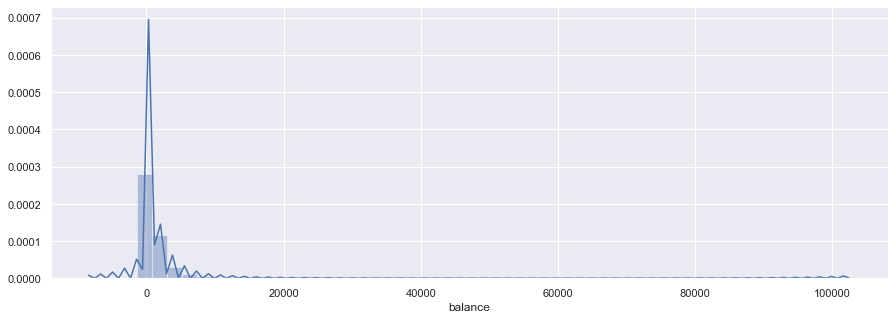

In [23]:
plt.figure(figsize=(15,5))
sns.distplot(data_cl1['balance'])

In [24]:
data_cl1['balance'].describe(percentiles=[0.1,0.2,0.3,0.5,0.75,0.8,0.9,0.95])

count     30905.000000
mean       1425.668630
std        3190.976569
min       -8019.000000
10%           0.000000
20%          27.000000
30%         140.000000
50%         473.000000
75%        1502.000000
80%        1959.200000
90%        3717.000000
95%        5969.000000
max      102127.000000
Name: balance, dtype: float64

In [25]:
q=data_cl1['balance'].quantile(0.99)
q

13711.0

In [26]:
in_debt=data_cl1[data_cl1['balance']<0]
in_debt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 12662 to 44908
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2224 non-null   int64 
 1   job        2224 non-null   object
 2   marital    2224 non-null   object
 3   education  2224 non-null   object
 4   default    2224 non-null   object
 5   balance    2224 non-null   int64 
 6   housing    2224 non-null   object
 7   loan       2224 non-null   object
 8   contact    2224 non-null   object
 9   day        2224 non-null   int64 
 10  month      2224 non-null   object
 11  duration   2224 non-null   int64 
 12  campaign   2224 non-null   int64 
 13  pdays      2224 non-null   int64 
 14  previous   2224 non-null   int64 
 15  y          2224 non-null   object
dtypes: int64(7), object(9)
memory usage: 295.4+ KB


In [27]:
in_debt['y'].value_counts()

no     2064
yes     160
Name: y, dtype: int64

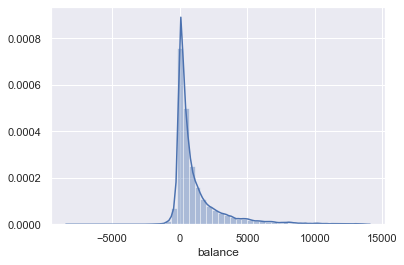

In [28]:
b1=data_cl1[data_cl1['balance']<q]
sns.distplot(b1['balance'])

In [29]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30594 entries, 12657 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        30594 non-null  int64 
 1   job        30594 non-null  object
 2   marital    30594 non-null  object
 3   education  30594 non-null  object
 4   default    30594 non-null  object
 5   balance    30594 non-null  int64 
 6   housing    30594 non-null  object
 7   loan       30594 non-null  object
 8   contact    30594 non-null  object
 9   day        30594 non-null  int64 
 10  month      30594 non-null  object
 11  duration   30594 non-null  int64 
 12  campaign   30594 non-null  int64 
 13  pdays      30594 non-null  int64 
 14  previous   30594 non-null  int64 
 15  y          30594 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [30]:
q_d=data_cl1['duration'].quantile(0.99)
q_d

1274.8799999999974

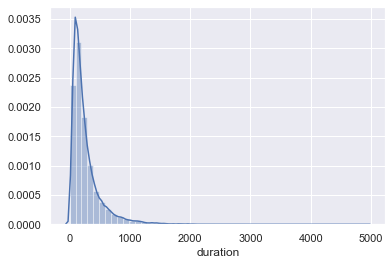

In [31]:
sns.distplot(data_cl1['duration'])

In [32]:
b1=b1[b1['duration']<q_d]
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30289 entries, 12657 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        30289 non-null  int64 
 1   job        30289 non-null  object
 2   marital    30289 non-null  object
 3   education  30289 non-null  object
 4   default    30289 non-null  object
 5   balance    30289 non-null  int64 
 6   housing    30289 non-null  object
 7   loan       30289 non-null  object
 8   contact    30289 non-null  object
 9   day        30289 non-null  int64 
 10  month      30289 non-null  object
 11  duration   30289 non-null  int64 
 12  campaign   30289 non-null  int64 
 13  pdays      30289 non-null  int64 
 14  previous   30289 non-null  int64 
 15  y          30289 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.9+ MB


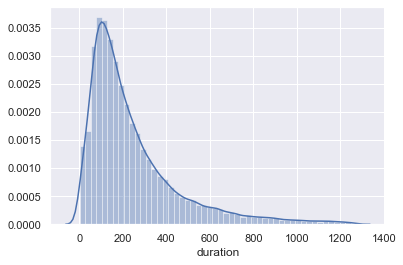

In [33]:
sns.distplot(b1['duration'])

#### campaign & previous"
   ##### are 2 discrete variables represent the number of contacts performed during and before the campaign for this client

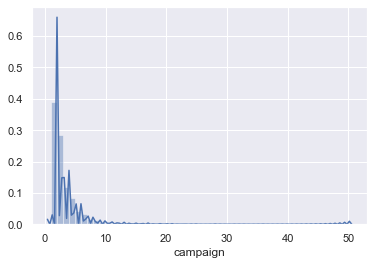

In [34]:
sns.distplot(b1['campaign'])

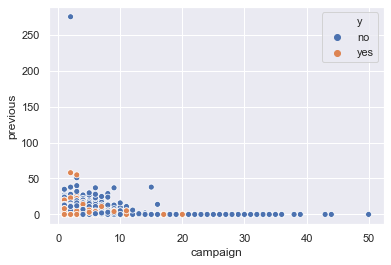

In [35]:
sns.scatterplot(x='campaign', y='previous', data=b1, hue='y')

In [36]:
b1['previous'].describe(percentiles=[0.1, 0.25, 0.5 ,0.75 ,0.8,0.9,0.95,0.99])

count    30289.000000
mean         0.811615
std          2.717986
min          0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
80%          1.000000
90%          3.000000
95%          4.000000
99%         10.000000
max        275.000000
Name: previous, dtype: float64

In [37]:
b1=b1[b1['previous']< 200]

In [38]:
b1['campaign'].describe()

count    30288.000000
mean         2.750231
std          2.955071
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         50.000000
Name: campaign, dtype: float64

In [39]:
q_c=data_cl1['campaign'].quantile(0.99)
q_c

16.0

In [40]:
b1=b1[b1['campaign']<q_c]

In [41]:
b1['campaign'].describe()

count    29967.000000
mean         2.547235
std          2.137149
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: campaign, dtype: float64

#### Examining month and day features:

In [42]:
b1['month']=b1['month'].map({'jan':1, 'feb':2, 'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [43]:
## Creating a checkpoint for the data we will preprocess to be fitted into the RandomForest Model
RF_data=b1.copy()

# Preprocessing the data for a Random Forest Model

### drop the ['duration' and 'pdays'] features

In [44]:
rf_data=RF_data.drop(RF_data[['pdays']],axis=1)

## Preprocessing the binary features

In [45]:
rf_data['housing']=rf_data['housing'].map({'yes':1, 'no':0})
rf_data['default']=rf_data['default'].map({'yes':1, 'no':0})
rf_data['loan']=rf_data['loan'].map({'yes':1, 'no':0})

### transform education to a binary feature:
    -higher degree --> 1
    -school degree --> 0

In [46]:
rf_data['education']=rf_data['education'].map({'secondary':0, 'primary':0, 'tertiary':1})

## Dealing with object features: using get.dummies method
    without drop_first=True, because multicollinearity has no impact on Tree based model
    Create a loop which will create the dummies, concatenate them, and drop the original feature

In [47]:
for i in ['job','marital', 'contact']:
    dummies=pd.get_dummies(rf_data[i])
    rf_data=pd.concat([rf_data,dummies], axis=1)
    rf_data=rf_data.drop(rf_data[[i]],axis=1)
rf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29967 entries, 12657 to 45210
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            29967 non-null  int64 
 1   education      29967 non-null  int64 
 2   default        29967 non-null  int64 
 3   balance        29967 non-null  int64 
 4   housing        29967 non-null  int64 
 5   loan           29967 non-null  int64 
 6   day            29967 non-null  int64 
 7   month          29967 non-null  int64 
 8   duration       29967 non-null  int64 
 9   campaign       29967 non-null  int64 
 10  previous       29967 non-null  int64 
 11  y              29967 non-null  object
 12  admin.         29967 non-null  uint8 
 13  blue-collar    29967 non-null  uint8 
 14  entrepreneur   29967 non-null  uint8 
 15  housemaid      29967 non-null  uint8 
 16  management     29967 non-null  uint8 
 17  retired        29967 non-null  uint8 
 18  self-employed  29967 n

In [48]:
## labeling the Target feature: subscribed--> 1 , unsubscribed --> 0

rf_data['y']=rf_data['y'].map({'yes':1, 'no':0})

In [49]:
rf_data_p = rf_data.reindex(['age', 'balance','duration', 'campaign', 'previous', 'education', 'default', 'housing', 'loan',  'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician','unemployed', 'divorced', 'married', 'single', 'cellular',
       'telephone', 'day','month', 'y'], axis=1)

In [50]:
rf_data_p.describe()

,age,balance,duration,campaign,previous,education,default,housing,loan,admin.,...,technician,unemployed,divorced,married,single,cellular,telephone,day,month,y
count,29967.00000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,...,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000
mean,40.87870,1208.985484,248.221978,2.547235,0.810692,0.341042,0.016485,0.498582,0.166250,0.115527,...,0.179698,0.030901,0.113124,0.593987,0.292889,0.914039,0.085961,15.848233,6.407548,0.142423
std,10.90206,1988.111573,214.462617,2.137149,2.223774,0.474067,0.127333,0.500006,0.372311,0.319662,...,0.383942,0.173051,0.316750,0.491095,0.455095,0.280311,0.280311,8.187582,2.761237,0.349490
min,18.00000,-8019.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,32.00000,79.000000,104.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,5.000000,0.000000
50%,39.00000,464.000000,180.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,16.000000,7.000000,0.000000
75%,48.00000,1445.000000,317.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,21.000000,8.000000,0.000000
max,95.00000,13683.000000,1272.000000,15.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000


In [55]:
print('to save our preprocessed data, write:','rf_data_p.to_csv("..\DG-Project\BD-rf-prep.csv", index=False)')

to save our preprocessed data, write: rf_data_p.to_csv("..\DG-Project\BD-rf-prep.csv", index=False)


### pdays

In [56]:
b1['pdays'].describe()

count    29967.000000
mean        56.840358
std        113.423722
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         47.500000
max        871.000000
Name: pdays, dtype: float64

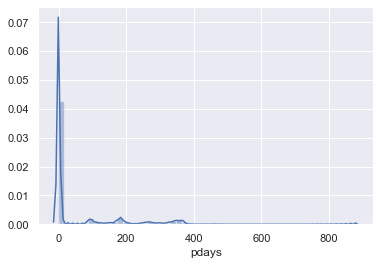

In [57]:
sns.distplot(b1['pdays'])

In [58]:
x1=b1[b1['pdays']==-1]
x1['y'].value_counts()

no     19718
yes     2530
Name: y, dtype: int64

In [59]:
b1['y'].value_counts()

no     25699
yes     4268
Name: y, dtype: int64

In [60]:
onetime=b1[b1['campaign']==1]
onetime['y'].value_counts()
# from the subscribed (y=yes) we have about 50% accept from the first time

no     9463
yes    2139
Name: y, dtype: int64

In [61]:
more_16=b1[b1['campaign']>16]
more_16['y'].value_counts()

Series([], Name: y, dtype: int64)

### we are going to preprocess the categorical data by 2 ways:
1. by creating dummies for the categorical nominal variables
2. by label encoding 

### dealing with "contact"
    . by creating dummies using pandas method "get_dummies". Here we are going to drop 1 of ur variables because we are preprocessing the data for a Logistic Regression model and based on prior knowledge, I favor to prevent the multicollinearity between the independent features will lead for better accuracy in Regression models
    . PS: If we wanted to use a RandomForest model we may not care a lot about the multicolinearity between the features.
            So in this case we can just go in the same steps but without change drop_first to True

In [62]:
b1['contact'].value_counts()

cellular     27391
telephone     2576
Name: contact, dtype: int64

In [63]:
b1.groupby(['contact'])['y'].value_counts()

contact    y  
cellular   no     23444
           yes     3947
telephone  no      2255
           yes      321
Name: y, dtype: int64

In [64]:
print(3953/27671, 'cellular')
print(323/2620, 'telephone')
# dummies

0.14285714285714285 cellular
0.12328244274809161 telephone


In [65]:
contact_=pd.get_dummies(b1['contact'], drop_first=True)
contact_.head()

,telephone
12657,0
12658,0
12659,0
12660,1
12661,0


In [66]:
contact_.describe()

,telephone
count,29967.000000
mean,0.085961
std,0.280311
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [67]:
b1=pd.concat([b1,contact_], axis=1)
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29967 entries, 12657 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        29967 non-null  int64 
 1   job        29967 non-null  object
 2   marital    29967 non-null  object
 3   education  29967 non-null  object
 4   default    29967 non-null  object
 5   balance    29967 non-null  int64 
 6   housing    29967 non-null  object
 7   loan       29967 non-null  object
 8   contact    29967 non-null  object
 9   day        29967 non-null  int64 
 10  month      29967 non-null  int64 
 11  duration   29967 non-null  int64 
 12  campaign   29967 non-null  int64 
 13  pdays      29967 non-null  int64 
 14  previous   29967 non-null  int64 
 15  y          29967 non-null  object
 16  telephone  29967 non-null  uint8 
dtypes: int64(8), object(8), uint8(1)
memory usage: 3.9+ MB


### dealing with binary features (default, housing, loan)
    .by mapping them to 1s and 0s instead of 'yes' and 'no'. using pandas ".map" method

In [68]:
b1['housing'].unique()

array(['no', 'yes'], dtype=object)

In [69]:
b1['housing']=b1['housing'].map({'yes':1, 'no':0})
b1['housing'].describe()

count    29967.000000
mean         0.498582
std          0.500006
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: housing, dtype: float64

In [70]:
b1['default'].value_counts()

no     29473
yes      494
Name: default, dtype: int64

In [71]:
b1['default']=b1['default'].map({'yes':1, 'no':0})

In [72]:
b1.groupby(['default'])['y'].value_counts()

default  y  
0        no     25239
         yes     4234
1        no       460
         yes       34
Name: y, dtype: int64

In [73]:
b1['loan'].value_counts()

no     24985
yes     4982
Name: loan, dtype: int64

In [74]:
b1['loan']=b1['loan'].map({'yes':1, 'no':0})

#### dealing with "marital" feature:
    .by using dummies method

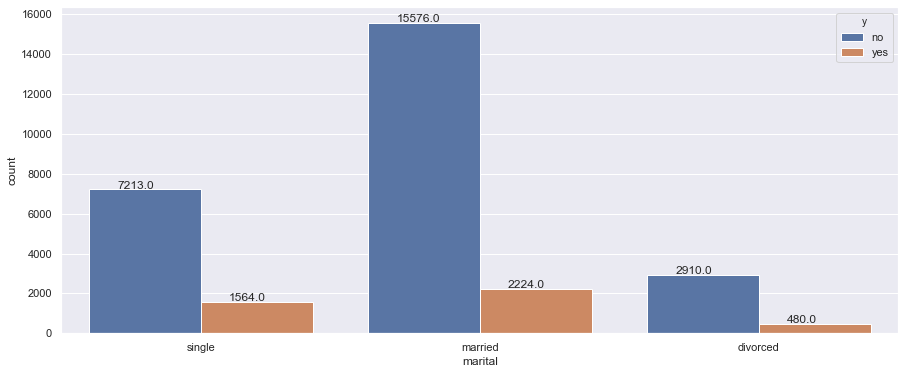

In [75]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='marital',  data=b1, hue='y')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [76]:
marital_=pd.get_dummies(b1['marital'],drop_first=True)
marital_.head()

,married,single
12657,0,1
12658,1,0
12659,1,0
12660,0,1
12661,0,1


In [77]:
b1=pd.concat([b1,marital_], axis=1)
b1.info()
# we must drop the 'marital feature after we created dummies from it'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29967 entries, 12657 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        29967 non-null  int64 
 1   job        29967 non-null  object
 2   marital    29967 non-null  object
 3   education  29967 non-null  object
 4   default    29967 non-null  int64 
 5   balance    29967 non-null  int64 
 6   housing    29967 non-null  int64 
 7   loan       29967 non-null  int64 
 8   contact    29967 non-null  object
 9   day        29967 non-null  int64 
 10  month      29967 non-null  int64 
 11  duration   29967 non-null  int64 
 12  campaign   29967 non-null  int64 
 13  pdays      29967 non-null  int64 
 14  previous   29967 non-null  int64 
 15  y          29967 non-null  object
 16  telephone  29967 non-null  uint8 
 17  married    29967 non-null  uint8 
 18  single     29967 non-null  uint8 
dtypes: int64(11), object(5), uint8(3)
memory usage: 5.2+ MB


### Dealing with "education" feature:
    .We transformed this feauture to a binary feature and associating 1s: people with high degree 
                                                                      0s: people with school degree

In [78]:
b1['education'].value_counts()

secondary    15589
tertiary     10220
primary       4158
Name: education, dtype: int64

In [79]:
b1['education']=b1['education'].map({'secondary':0, 'primary':0, 'tertiary':1})

In [80]:
b1['education'].value_counts()

0    19747
1    10220
Name: education, dtype: int64

## Dealing with job feature:
    .Using dummies method

In [81]:
b1['job'].value_counts()

management       7039
blue-collar      5404
technician       5385
admin.           3462
services         2565
retired          1614
self-employed    1112
entrepreneur      965
unemployed        926
housemaid         849
student           646
Name: job, dtype: int64

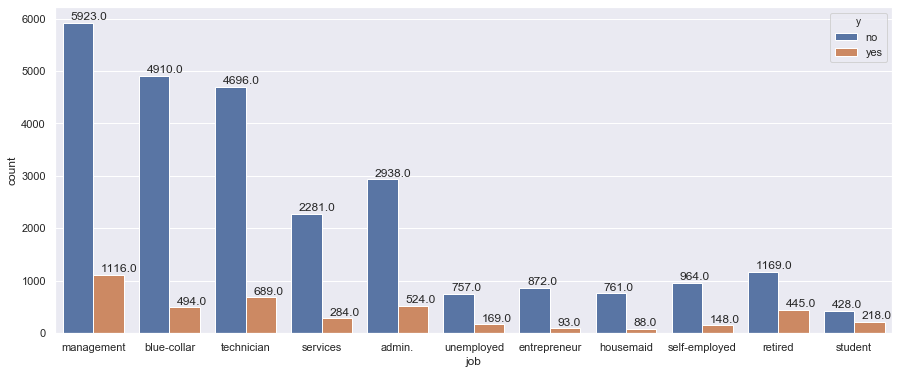

In [82]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='job',  data=b1, hue='y')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [83]:
job_=pd.get_dummies(b1['job'],drop_first=True)
# we dropped the admin job type in order to prevent mlticollinearity 

In [84]:
job_.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
12657,0,0,0,1,0,0,0,0,0,0
12658,1,0,0,0,0,0,0,0,0,0
12659,1,0,0,0,0,0,0,0,0,0
12660,0,0,0,0,0,0,0,0,1,0
12661,0,0,0,0,0,0,0,0,1,0


In [85]:
b1=pd.concat([b1,job_], axis=1)

## Labeling the target variable "y"

In [86]:
b1['y']=b1['y'].map({'yes':1, 'no':0})

In [87]:
b1.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
count,29967.00000,29967,29967,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967,29967.000000,...,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000
unique,NaN,11,3,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,management,married,NaN,NaN,NaN,NaN,NaN,cellular,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7039,17800,NaN,NaN,NaN,NaN,NaN,27391,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.87870,NaN,NaN,0.341042,0.016485,1208.985484,0.498582,0.166250,NaN,15.848233,...,0.180332,0.032202,0.028331,0.234892,0.053859,0.037107,0.085594,0.021557,0.179698,0.030901
std,10.90206,NaN,NaN,0.474067,0.127333,1988.111573,0.500006,0.372311,NaN,8.187582,...,0.384470,0.176539,0.165920,0.423938,0.225743,0.189028,0.279768,0.145234,0.383942,0.173051
min,18.00000,NaN,NaN,0.000000,0.000000,-8019.000000,0.000000,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,NaN,NaN,0.000000,0.000000,79.000000,0.000000,0.000000,NaN,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.00000,NaN,NaN,0.000000,0.000000,464.000000,0.000000,0.000000,NaN,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.00000,NaN,NaN,1.000000,0.000000,1445.000000,1.000000,0.000000,NaN,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [88]:
object_cols=[col for col in b1.columns if b1[col].dtype=='object']
object_cols

['job', 'marital', 'contact']

In [89]:
b1_p=b1.drop(b1[object_cols], axis=1)
b1_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29967 entries, 12657 to 45210
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            29967 non-null  int64
 1   education      29967 non-null  int64
 2   default        29967 non-null  int64
 3   balance        29967 non-null  int64
 4   housing        29967 non-null  int64
 5   loan           29967 non-null  int64
 6   day            29967 non-null  int64
 7   month          29967 non-null  int64
 8   duration       29967 non-null  int64
 9   campaign       29967 non-null  int64
 10  pdays          29967 non-null  int64
 11  previous       29967 non-null  int64
 12  y              29967 non-null  int64
 13  telephone      29967 non-null  uint8
 14  married        29967 non-null  uint8
 15  single         29967 non-null  uint8
 16  blue-collar    29967 non-null  uint8
 17  entrepreneur   29967 non-null  uint8
 18  housemaid      29967 non-null  uint8
 19  

In [90]:
b1_p.to_csv('C:/Users/Fawzi/Desktop/DG-Project/BD1_p.csv', index=False)

# PS: we made further preprocessing steps for our models are added in the modeling notebook added in week 12. Those were not added to this current notebook.